# Test libsurface.cpp - Image 3D

In [1]:
%load_ext autoreload
%autoreload 2
from sys import getsizeof
from time import time

In [2]:
import numpy as np
np.random.seed(0)
img1 = np.random.randint(0, 256, (10,10, 10), dtype=np.uint8)
img2 = np.random.randint(0, 256, (10,10, 10), dtype=np.uint8)

bool_img = np.random.randint(0, 2, (10,10, 10), dtype=bool)

In [3]:
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace, line
import euchar.cppbinding.utils as u
import euchar.cppbinding.surface as s
from euchar.display import euler_curve_plot

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import arange, array, meshgrid, rot90
# For contours levels
from matplotlib.ticker import MaxNLocator

def plot_contour_surface(surface, nbins=15, dx=0.05, dy=0.05,
    title="Contourf", color_map='RdYlBu',
    xlabel="", ylabel="", xticks=[], yticks=[],
    figsize=(4,4), save=False, filename="--", dpi=220):
    """
    Plot contours of function

    Parameters
    ----------
    nbins
        int, regulates the smoothness of the contours
    color_map
        string, options are: 'viridis', 'plasma', 'inferno', 'magma',
        'Greys', 'OrRd', 'Reds',
        'binary', 'cool', 'hot', 'afmhot', 'coppet', 'PRGn', 'PiYG',
        'RdBu', 'RdYlBu', 'Spectral', 'coolwarm' and others.
    """

    # Contours levels
    levels = MaxNLocator(nbins=nbins).tick_values(surface.min(), surface.max())
    # Color map
    cmap = plt.get_cmap(color_map)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    x = arange(surface.shape[1])
    y = arange(surface.shape[0])
    xx, yy = meshgrid(x, y)

    # Plot the surface.
    cf = ax.contourf(xx + dx/2.,
                     yy + dy/2.,
                     surface,
                     levels=levels,
                     cmap=cmap)
    fig.colorbar(cf, ax=ax)

    ax.set(xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks)
    #ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
    #ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
    ax.set_title(title)
    fig.tight_layout()

    if save == True:
        plt.savefig(fname=filename, dpi=dpi)
    else:
        plt.show()

In [5]:
st = time()
v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")
print(f"time: {time() - st:.2f} | size v: {getsizeof(v) / 1024 / 1024:.2f} Mb")

time: 0.16 | size v: 256.00 Mb


In [6]:
v2 = np.arange(10)
print(v2.dtype)
print(v.sum(), v2.sum())

int32
37748736 45


***

### Naive surface 3D images

In [7]:
st = time()
naive = s.naive_images_3d(img1, img2, 255, 255)
print(f"time: {time()-st:.2f}")

time: 28.35


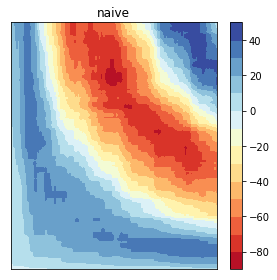

In [8]:
plot_contour_surface(np.array(naive), title="naive")

### Surface 3D images

In [ ]:
surf = np.array(s.images_3d(img1, img2, v, 255, 255))

In [1]:
%%writefile ..\\surface_3d.py
from sys import getsizeof
from time import time
import numpy as np

np.random.seed(0)
img1 = np.random.randint(0, 256, (10,10, 10), dtype=np.uint8)
img2 = np.random.randint(0, 256, (10,10, 10), dtype=np.uint8)

import euchar.cppbinding.surface as s

print("Imports done\n=====")

st = time()
v= np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")
print(f"loading v...\n\ttime: {time() - st:.2f} | size v: {getsizeof(v) / 1024 / 1024:.2f} Mb")

print("="*10)

print("Start surface computation")
surf = s.images_3d(img1, img2, v, 255, 255)
print("Done")
print(getsizeof(surf))

Writing ..\\surface_3d.py
